In [2]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
# Import useful Libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
# Read the data set we need using Pandas from csv file 
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_vaccination_vs_death_ratio.csv")

Coefficients: -1.1422133580564586
Intercept: 78.73515370381892


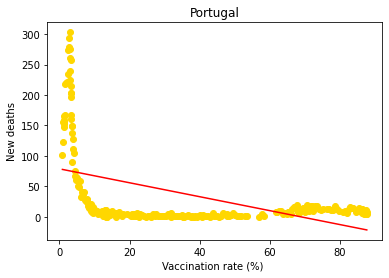

Mean absolute error: 44.99
Residual sum of squares (MSE): 3593.70
R2-score: 0.24


In [4]:
# We put the data from Portugal in the mydf variable .
mydf = df[df.country == "Portugal"]
# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.title("Portugal")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()
# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)
# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")
# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")
# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

As we can see, our linear model has an R2-score of 0.24, which is close to zero, indicating that it is not a good model. Based on the shape of the plot, it appears that this plot is curved, therefore Polynomial regression may be preferable

In [20]:
def plot_vaccine_mortality(country_name, df, degree=2):
    """
    This function receives the dataset and the name of the country and dgree then divides
    data into two parts the [test] and [train]. And a polynomial regression model applies to 
    training data.Then evaluate the model using test data and prints the results. 
    how to use:
    >>> plot_vaccine_mortality("Italy", df, 8)
    """
    #---------------------------
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = df[df.country == country_name]
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.ratio, train.New_deaths,  color= np.random.rand(3,))
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

------------------------------------Portugal------------------------------------
Coefficients: 
----------5.7037399394 * X^1
----------0.0537673718 * X^2
Intercept:  128.59917104588402


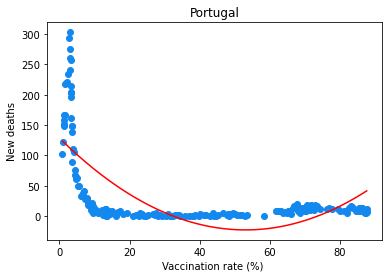

Mean absolute error: 36.41
Residual sum of squares (MSE): 2389.94
R2-score: 0.49
--------------------------------------------------------------------------------


In [21]:
plot_vaccine_mortality("Portugal", df, 2)

------------------------------------Portugal------------------------------------
Coefficients: 
---------47.1032741068 * X^1
----------3.0762746744 * X^2
----------0.0967004684 * X^3
----------0.0015715960 * X^4
----------0.0000126912 * X^5
----------0.0000000402 * X^6
Intercept:  266.0609125964729


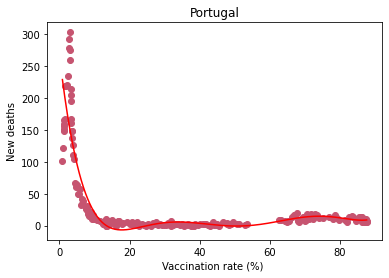

Mean absolute error: 14.68
Residual sum of squares (MSE): 882.94
R2-score: 0.80
--------------------------------------------------------------------------------


In [22]:
plot_vaccine_mortality("Portugal", df, 6)

-------------------------------------Spain--------------------------------------
Coefficients: 
--------226.0548140500 * X^1
---------23.2473084630 * X^2
----------1.1829032622 * X^3
----------0.0327764564 * X^4
----------0.0005048984 * X^5
----------0.0000040644 * X^6
----------0.0000000133 * X^7
Intercept:  899.8590220267592


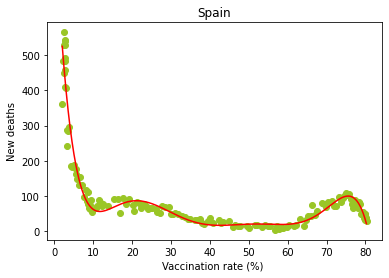

Mean absolute error: 17.94
Residual sum of squares (MSE): 962.08
R2-score: 0.94
--------------------------------------------------------------------------------


In [23]:
plot_vaccine_mortality("Spain", df, 7)

----------------------------------Switzerland-----------------------------------
Coefficients: 
---------21.9347377154 * X^1
----------2.7814125261 * X^2
----------0.1774374643 * X^3
----------0.0062080871 * X^4
----------0.0001211139 * X^5
----------0.0000012350 * X^6
----------0.0000000051 * X^7
Intercept:  75.7198038817382


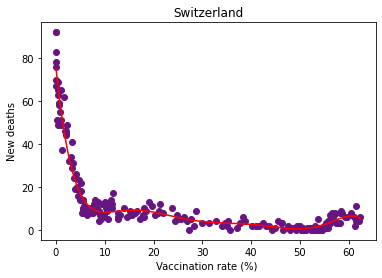

Mean absolute error: 2.74
Residual sum of squares (MSE): 18.36
R2-score: 0.95
--------------------------------------------------------------------------------


In [24]:
plot_vaccine_mortality("Switzerland", df, 7)

------------------------------------Austria-------------------------------------
Coefficients: 
---------24.8417827311 * X^1
----------3.5203328478 * X^2
----------0.2239447960 * X^3
----------0.0073504167 * X^4
----------0.0001302356 * X^5
----------0.0000011828 * X^6
----------0.0000000043 * X^7
Intercept:  80.3433244669877


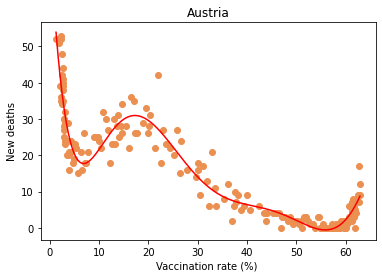

Mean absolute error: 2.77
Residual sum of squares (MSE): 15.34
R2-score: 0.92
--------------------------------------------------------------------------------


In [25]:
plot_vaccine_mortality("Austria", df, 7)

-------------------------------The United Kingdom-------------------------------
Coefficients: 
--------238.6512073996 * X^1
---------22.7213552944 * X^2
----------0.8202512013 * X^3
----------0.0145591394 * X^4
----------0.0001268224 * X^5
----------0.0000004305 * X^6
Intercept:  450.84367437314825


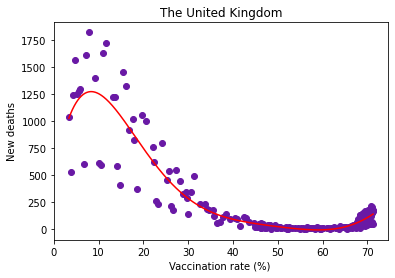

Mean absolute error: 71.08
Residual sum of squares (MSE): 22835.99
R2-score: 0.85
--------------------------------------------------------------------------------


In [26]:
plot_vaccine_mortality("The United Kingdom", df, 6)

----------------------------United States of America----------------------------
Coefficients: 
--------229.5390875948 * X^1
---------44.6140294754 * X^2
----------2.1403310126 * X^3
----------0.0435650055 * X^4
----------0.0003725865 * X^5
----------0.0000009177 * X^6
Intercept:  3128.1055923347676


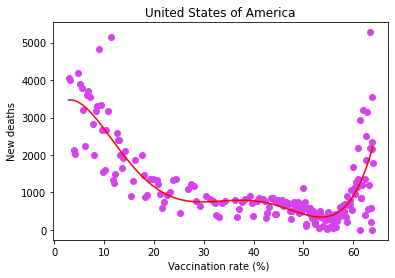

Mean absolute error: 354.82
Residual sum of squares (MSE): 359243.95
R2-score: 0.69
--------------------------------------------------------------------------------


In [27]:
plot_vaccine_mortality("United States of America", df, 6)